In [1]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: /Users/annaorias/eecs127_hw4/.venv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp
import cv2

In [3]:
gray_berkeley1 = cv2.imread('Berkeley1.png', cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0
gray_berkeley2 = cv2.imread('Berkeley2.png', cv2.IMREAD_GRAYSCALE).astype(np.float32) / 255.0

libpng warning: iCCP: known incorrect sRGB profile


In [4]:
sigma_b1 = np.linalg.svd(gray_berkeley1, compute_uv=False)
sigma_b2 = np.linalg.svd(gray_berkeley2, compute_uv=False)

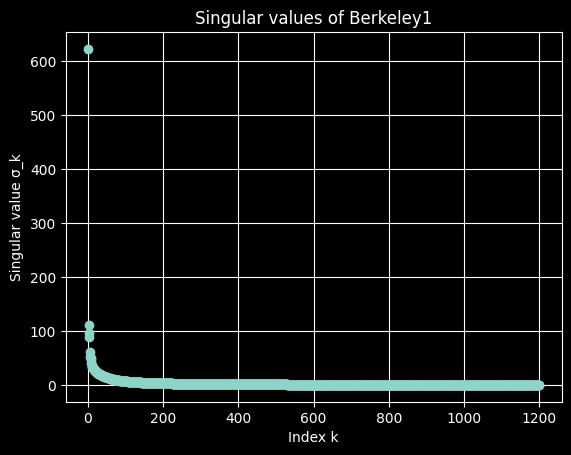

In [5]:
plt.figure()
ks = np.arange(1, len(sigma_b1) + 1)
plt.plot(ks, sigma_b1, marker='o', linestyle='None')  # discrete points
plt.xlabel("Index k")
plt.ylabel("Singular value σ_k")
plt.title("Singular values of Berkeley1")
plt.grid(True)
plt.show()

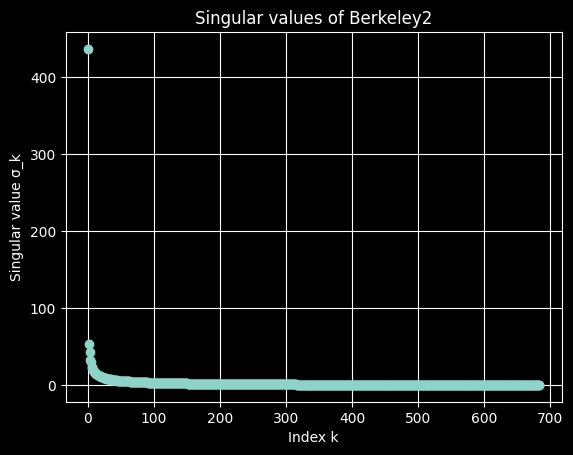

In [6]:
plt.figure()
ks = np.arange(1, len(sigma_b2) + 1)
plt.plot(ks, sigma_b2, marker='o', linestyle='None')  # discrete points
plt.xlabel("Index k")
plt.ylabel("Singular value σ_k")
plt.title("Singular values of Berkeley2")
plt.grid(True)
plt.show()

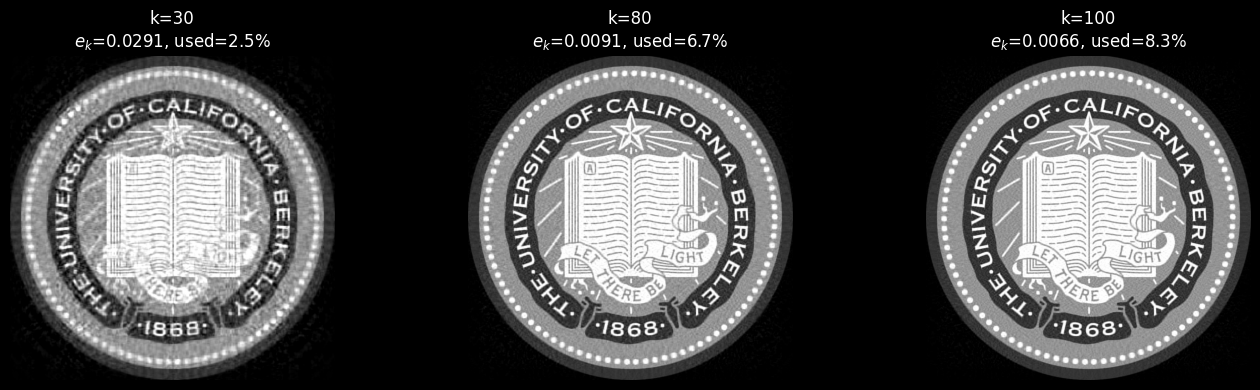

In [7]:
A1 = gray_berkeley1
U1, s1, V1t = np.linalg.svd(A1, full_matrices=False)

A1_frob = np.sum(s1**2)
H1, W1 = A1.shape
den = min(H1, W1)

ks = [30, 80, 100]
fig, axes = plt.subplots(1, len(ks), figsize=(14, 4))

results1 = []
for ax, k in zip(axes, ks):

    Bk = (U1[:, :k] * s1[:k]) @ V1t[:k, :]

    err2 = np.linalg.norm(A1 - Bk, 'fro')**2
    e_k = err2 / A1_frob

    pct = 100.0 * k / den

    results1.append((k, e_k, pct))

    ax.imshow(np.clip(Bk, 0.0, 1.0), cmap='gray', vmin=0.0, vmax=1.0)
    ax.set_title(f"k={k}\n$e_k$={e_k:.4f}, used={pct:.1f}%")
    ax.axis('off')

plt.tight_layout()
plt.show()

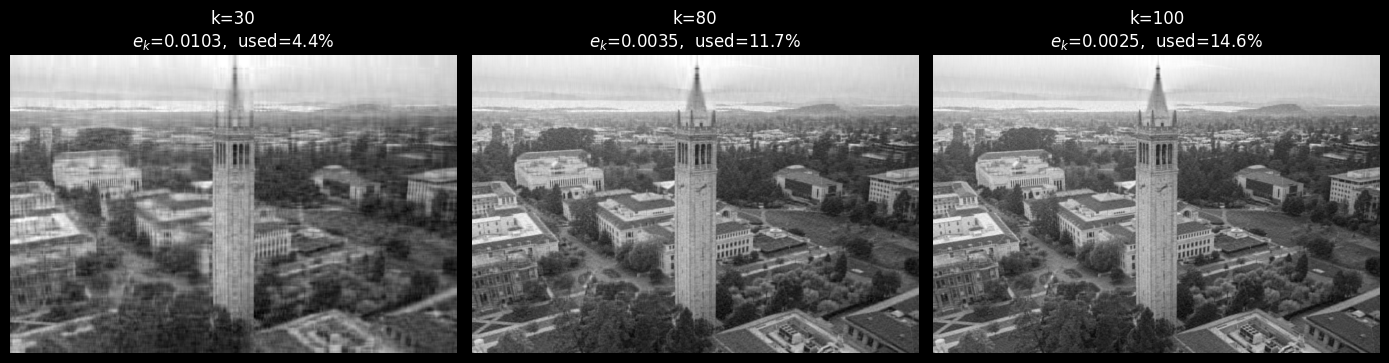

In [8]:
A2 = gray_berkeley2
U2, s2, V2t = np.linalg.svd(A2, full_matrices=False)

A2_frob = np.sum(s2**2)
H2, W2 = A2.shape
den = min(H2, W2)

ks = [30, 80, 100]
fig, axes = plt.subplots(1, len(ks), figsize=(14, 4))

results2 = []
for ax, k in zip(axes, ks):
    Bk = (U2[:, :k] * s2[:k]) @ V2t[:k, :]

    err2 = np.linalg.norm(A2 - Bk, 'fro')**2
    e_k = err2 / A2_frob

    pct = 100.0 * k / den

    results2.append((k, e_k, pct))

    ax.imshow(np.clip(Bk, 0, 1), cmap='gray', vmin=0, vmax=1.0)
    ax.set_title(f"k={k}\n$e_k$={e_k:.4f},  used={pct:.1f}%")
    ax.axis('off')

plt.tight_layout()
plt.show()